<a href="https://colab.research.google.com/github/techsidh/ShelfPerks_Takehome_ML_MayJune2023_business_economy/blob/main/techsidh_ShelfPerks_Takehome_ML_MayJune2023_business_economy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement:**

Here, I have two datasets. which contain business and economy class flight details. I merge them and the aim of the project is to create a model which will predict the price of the flight

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings               # Ignore Warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/content/drive/MyDrive/shelhparks/Air_business_economy (1).csv")

In [4]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class_type
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",Business
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",Business
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",Business
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",Business
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",Business


In [5]:
df.tail()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class_type
300256,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697",Economy
300257,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709",Economy
300258,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640",Economy
300259,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640",Economy
300260,31-03-2022,Vistara,UK,824,20:30,Chennai,24h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"8,640",Economy


In [6]:
df.sample(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class_type
17775,23-03-2022,Vistara,UK,705,07:30,Delhi,12h 25m,2+-stop,19:55,Chennai,"82,553",Business
295106,21-03-2022,Indigo,6E,929,13:10,Chennai,07h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:10,Kolkata,"4,079",Economy
17722,23-03-2022,Air India,AI,805,20:00,Delhi,14h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,10:55,Chennai,"45,257",Business
38267,13-02-2022,Vistara,UK,657,11:30,Bangalore,05h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,16:30,Delhi,"59,545",Business
10558,04-03-2022,Vistara,UK,747,06:30,Delhi,02h 05m,non-stop,08:35,Kolkata,"39,736",Business


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300261 non-null  object
 1   airline     300261 non-null  object
 2   ch_code     300261 non-null  object
 3   num_code    300261 non-null  int64 
 4   dep_time    300261 non-null  object
 5   from        300261 non-null  object
 6   time_taken  300261 non-null  object
 7   stop        300261 non-null  object
 8   arr_time    300261 non-null  object
 9   to          300261 non-null  object
 10  price       300261 non-null  object
 11  class_type  300261 non-null  object
dtypes: int64(1), object(11)
memory usage: 27.5+ MB


From the above data, I have to change datatypes of some features.
Those features are:
* date, dep_time, arr_time, time_taken - date column should have '*datetime*' datatype instead of object. 

* price - price column should have *'int64'* datatype instead of object.


##**Pre Processing**

<Axes: >

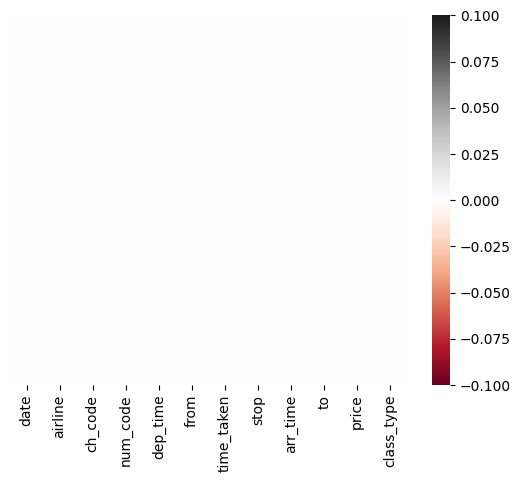

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, cmap = 'RdGy')

**We have no Null values in this dataset as we can see in heatmap visually.**

In [9]:
df.duplicated().sum()

2

**The above result are not duplicates, as all values are unique.**

In [10]:
#convert price column datatype to integer and also remove , from the values
df['price'] = df['price'].str.replace(',','').astype(int)

##**Date Extraction, Cleaning and Manipulation.**

In [11]:
df['travel_day'] = df['date'].str.split('-').str[0].astype(int)
df['travel_month'] = df['date'].str.split('-').str[1].astype(int)

In [12]:
df['dep_hours'] = pd.to_datetime(df['dep_time']).dt.hour
df['dep_min'] = pd.to_datetime(df['dep_time']).dt.minute


In [13]:
df['arr_hours'] = pd.to_datetime(df['arr_time']).dt.hour
df['arr_min'] = pd.to_datetime(df['arr_time']).dt.minute


In [14]:
minutes=[]
for i in range(0,300261):
  if len(df.time_taken[i])==7:
    c=df.time_taken[i].strip(" ")
    if c[1]==".":
      c=df.time_taken[i].partition("h")
      c=round(float(c[0])*60)
      minutes.append(int(c))
    else:
      minutes.append((int(c[0])*10+int(c[1]))*60+int(c[4])*10+int(c[5]))
  elif len(df.time_taken[i])==6:
    c=df.time_taken[i].strip(" ")
    minutes.append((int(c[0]))*60+int(c[3])*10+int(c[4]))

In [15]:
len(minutes)

300261

In [16]:
df["duration"]=minutes

In [17]:
#strip the unwanted commands
df['stop'] = df['stop'].apply(lambda x:x.rstrip('+stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\tstop\n\t\t\t\t\t\t\t\t\t\t\t\t ViaABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqurstuvwxyz'))

In [18]:
df['stop'] = df['stop'].apply(lambda x:x.rstrip('-+'))

In [19]:
df['stop'].replace('non',0,inplace = True)

In [20]:
df.describe()

,num_code,price,travel_day,travel_month,dep_hours,dep_min,arr_hours,arr_min,duration
count,300261.000000,300261.000000,300261.000000,300261.000000,300261.000000,300261.000000,300261.000000,300261.000000,300261.000000
mean,1417.771709,20883.717666,17.384619,2.664995,12.983531,27.020309,15.238935,29.485448,733.065436
std,1974.514439,22695.911266,8.074005,0.471993,5.363186,17.761449,6.050231,18.562370,431.576210
min,101.000000,1105.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,50.000000
25%,637.000000,4783.000000,12.000000,2.000000,8.000000,10.000000,10.000000,15.000000,405.000000
50%,818.000000,7425.000000,18.000000,3.000000,12.000000,30.000000,17.000000,30.000000,675.000000
75%,927.000000,42521.000000,24.000000,3.000000,18.000000,45.000000,20.000000,45.000000,970.000000
max,9991.000000,123071.000000,31.000000,3.000000,23.000000,55.000000,23.000000,59.000000,2990.000000


In [21]:
df.sample(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class_type,travel_day,travel_month,dep_hours,dep_min,arr_hours,arr_min,duration
246923,20-02-2022,Vistara,UK,874,08:30,Hyderabad,08h 25m,1,16:55,Delhi,11593,Economy,20,2,8,30,16,55,505
129926,21-02-2022,SpiceJet,SG,8157,06:20,Delhi,15h 00m,1,21:20,Chennai,7425,Economy,21,2,6,20,21,20,900
31183,30-03-2022,Air India,AI,623,21:15,Mumbai,10h 50m,1,08:05,Kolkata,36980,Business,30,3,21,15,8,5,650
116585,28-02-2022,Vistara,UK,981,21:50,Delhi,19h 00m,1,16:50,Kolkata,7910,Economy,28,2,21,50,16,50,1140
26784,23-03-2022,Air India,AI,888,19:00,Mumbai,17h 30m,1,12:30,Bangalore,54608,Business,23,3,19,0,12,30,1050


In [22]:
df.drop(['dep_time','arr_time','time_taken','date','num_code','ch_code'],axis =1,inplace = True)

These all features are no long needed for model development.

**For Better Exploratory Data Analysis,I chose to divide whole dataset into two sub-sets.**

In [23]:
cat_col = df.select_dtypes(include = 'object')
num_col = df.select_dtypes(exclude = 'object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   airline       300261 non-null  object
 1   from          300261 non-null  object
 2   stop          300261 non-null  object
 3   to            300261 non-null  object
 4   price         300261 non-null  int64 
 5   class_type    300261 non-null  object
 6   travel_day    300261 non-null  int64 
 7   travel_month  300261 non-null  int64 
 8   dep_hours     300261 non-null  int64 
 9   dep_min       300261 non-null  int64 
 10  arr_hours     300261 non-null  int64 
 11  arr_min       300261 non-null  int64 
 12  duration      300261 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 29.8+ MB


In [25]:
cat_col

,airline,from,stop,to,class_type
0,Air India,Delhi,0,Mumbai,Business
1,Air India,Delhi,0,Mumbai,Business
2,Air India,Delhi,1,Mumbai,Business
3,Air India,Delhi,1,Mumbai,Business
4,Air India,Delhi,1,Mumbai,Business
...,...,...,...,...,...
300256,Vistara,Chennai,1,Hyderabad,Economy
300257,Vistara,Chennai,1,Hyderabad,Economy
300258,Vistara,Chennai,1,Hyderabad,Economy
300259,Vistara,Chennai,1,Hyderabad,Economy


In [26]:
num_col

,price,travel_day,travel_month,dep_hours,dep_min,arr_hours,arr_min,duration
0,25612,11,2,18,0,20,0,120
1,25612,11,2,19,0,21,15,135
2,42220,11,2,20,0,20,45,1485
3,44450,11,2,21,25,23,55,1590
4,46690,11,2,17,15,23,55,400
...,...,...,...,...,...,...,...,...
300256,7697,31,3,7,5,20,55,830
300257,7709,31,3,7,5,20,55,830
300258,8640,31,3,12,30,9,5,1235
300259,8640,31,3,9,45,9,5,1400


#EDA

In [27]:
for i in cat_col.columns:
  if i == 'dep_time' or i == 'time_taken' or i == 'arr_time':
    pass
  else:
    print('\n')
    print('\033[1m' + 'Column name is:'+ i+'\033[0m')
    print(df[i].value_counts())



Column name is:airline
Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: airline, dtype: int64


Column name is:from
Delhi        61345
Mumbai       60903
Bangalore    52106
Kolkata      46347
Hyderabad    40860
Chennai      38700
Name: from, dtype: int64


Column name is:stop
1    250929
0     36044
2     13288
Name: stop, dtype: int64


Column name is:to
Mumbai       59109
Delhi        57361
Bangalore    51112
Kolkata      49535
Hyderabad    42776
Chennai      40368
Name: to, dtype: int64


Column name is:class_type
Economy     206774
Business     93487
Name: class_type, dtype: int64


##Analysisng categorical features with price feature


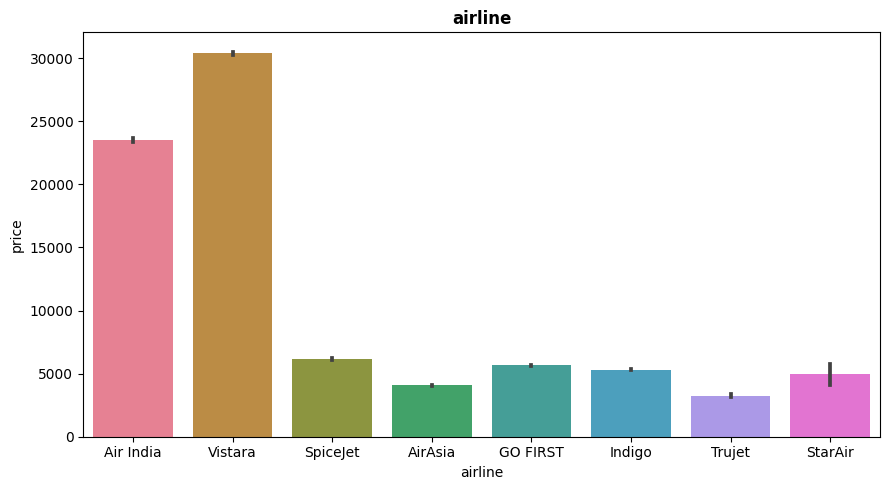

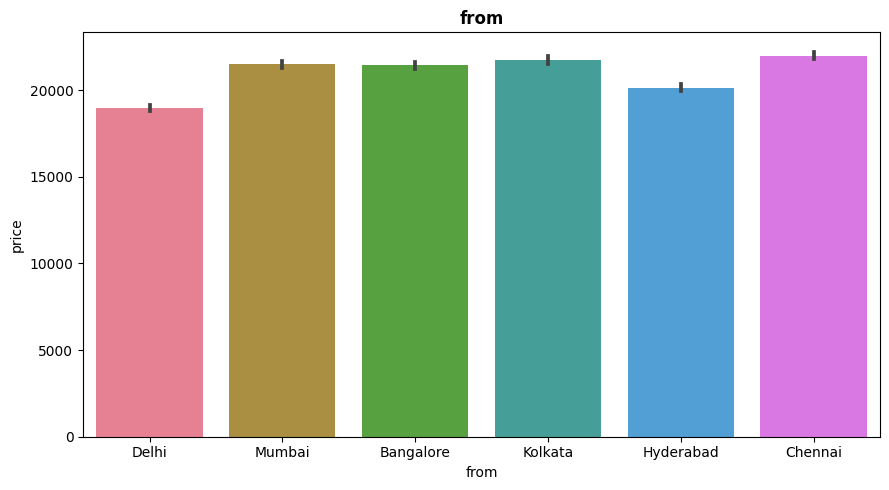

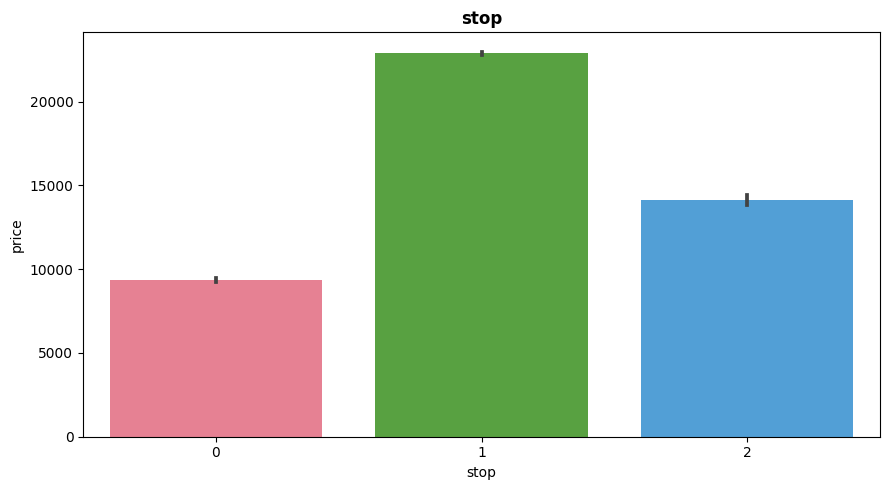

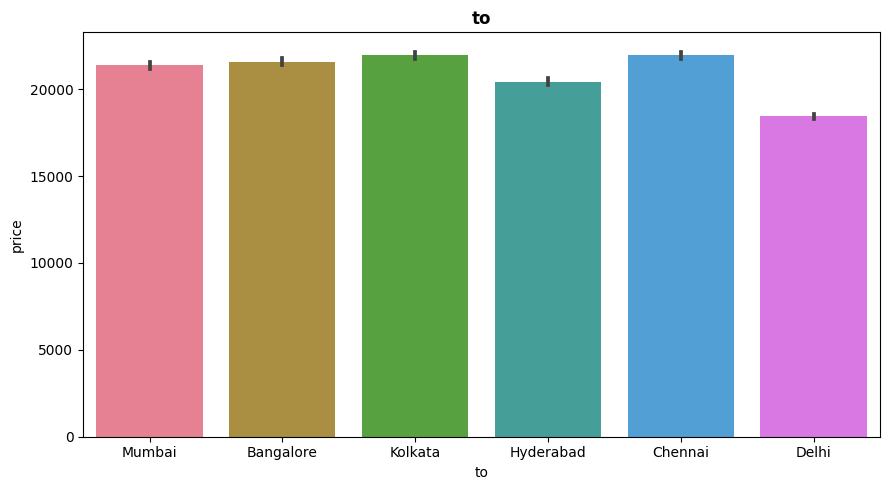

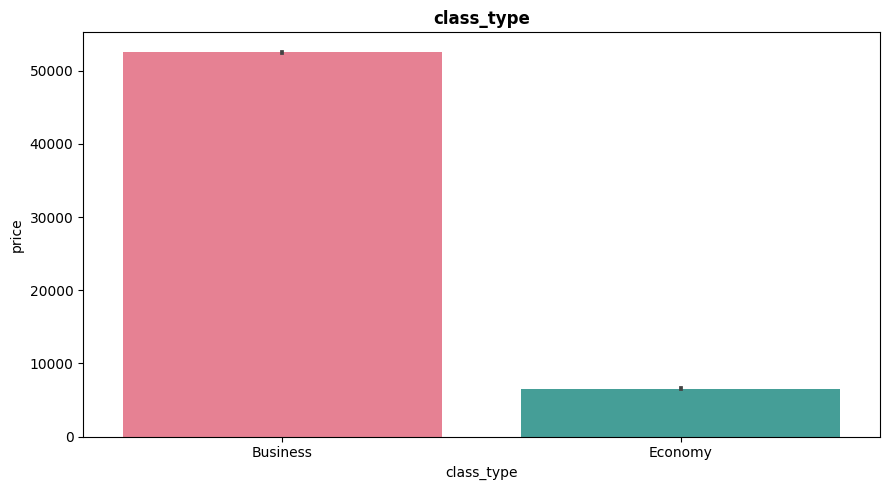

In [28]:
for i in cat_col.columns:
  plt.figure(figsize = (9,5))
  if i=='time_taken':
    pass
  else:  
    sns.barplot(x=df[i], y=df['price'],palette = 'husl').set_title( i, fontdict = { 'fontsize': 12},weight= 'bold')
    plt.tight_layout()


* **Airline** - The bar shows prices for various airlines.
* **From** - The bar shows prices for various departure locations.
* **Stop** - The bar shows prices depending on number of stops
* **To** - The bar shows prices for various destinations.
* **class_type** - The bar shows prices based on class types.

<Figure size 900x500 with 0 Axes>

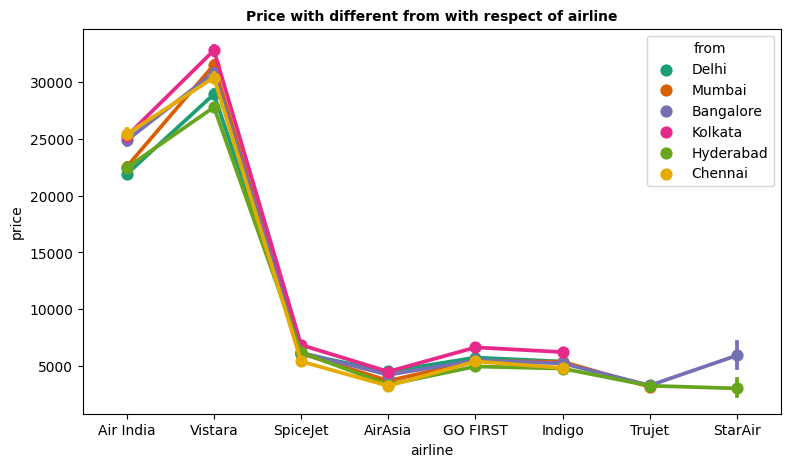

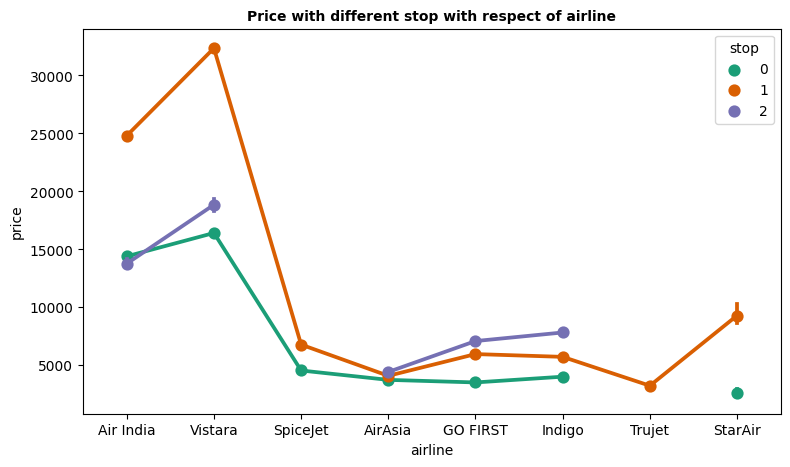

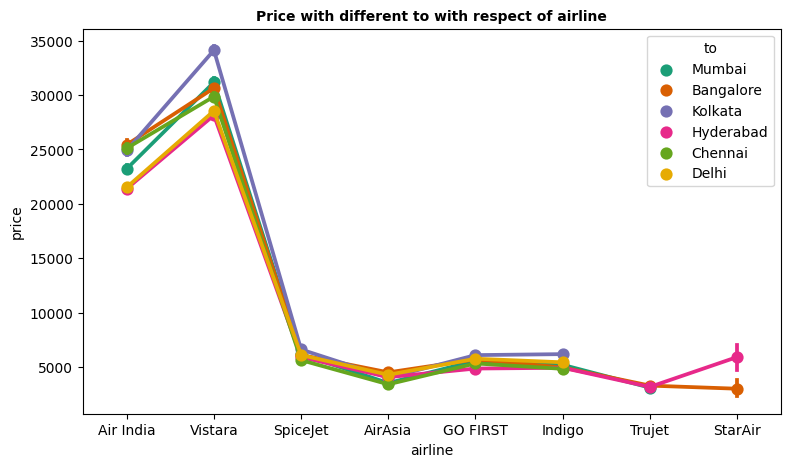

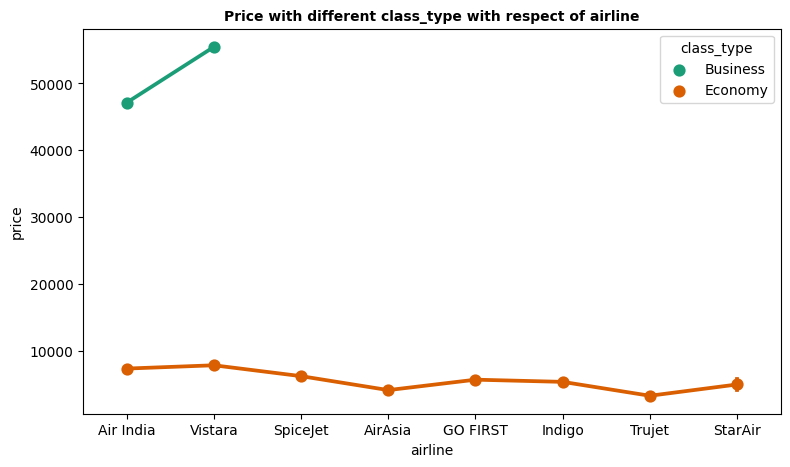

In [29]:
for i in cat_col.columns:
  plt.figure(figsize=(9,5))
  if i == 'airline':
    pass
  else:
    sns.pointplot(x=df['airline'],y=df['price'],hue=df[i], palette = 'Dark2')
    plt.title(f'Price with different {i} with respect of airline', fontdict = { 'fontsize': 10}, weight= 'bold')
    plt.show();

* **Form** - It can be noticed that most of the airlines have prices in range of 0 to 8000. Only two airlines that are Air india and Vistara have a higher price range. Only 2 airlines support fewer locations in range of 2 to 3.
* **Stop** - It can be noticed that most of airlines have 2 stops. Trujet only supports 1 stop flights. 
* **To** - It can be noticed that apart from 2 majore airlines, rest all have prices in range of 0 to 8000. Spicejet, Airasia, gofirst, indigo and trujet have almost same prices for all the destinations. 
* **class_type** - Only airindia and Vistara have business and economy class. Rest all airlines have only economy class.

##Check outliers of Numerical Features

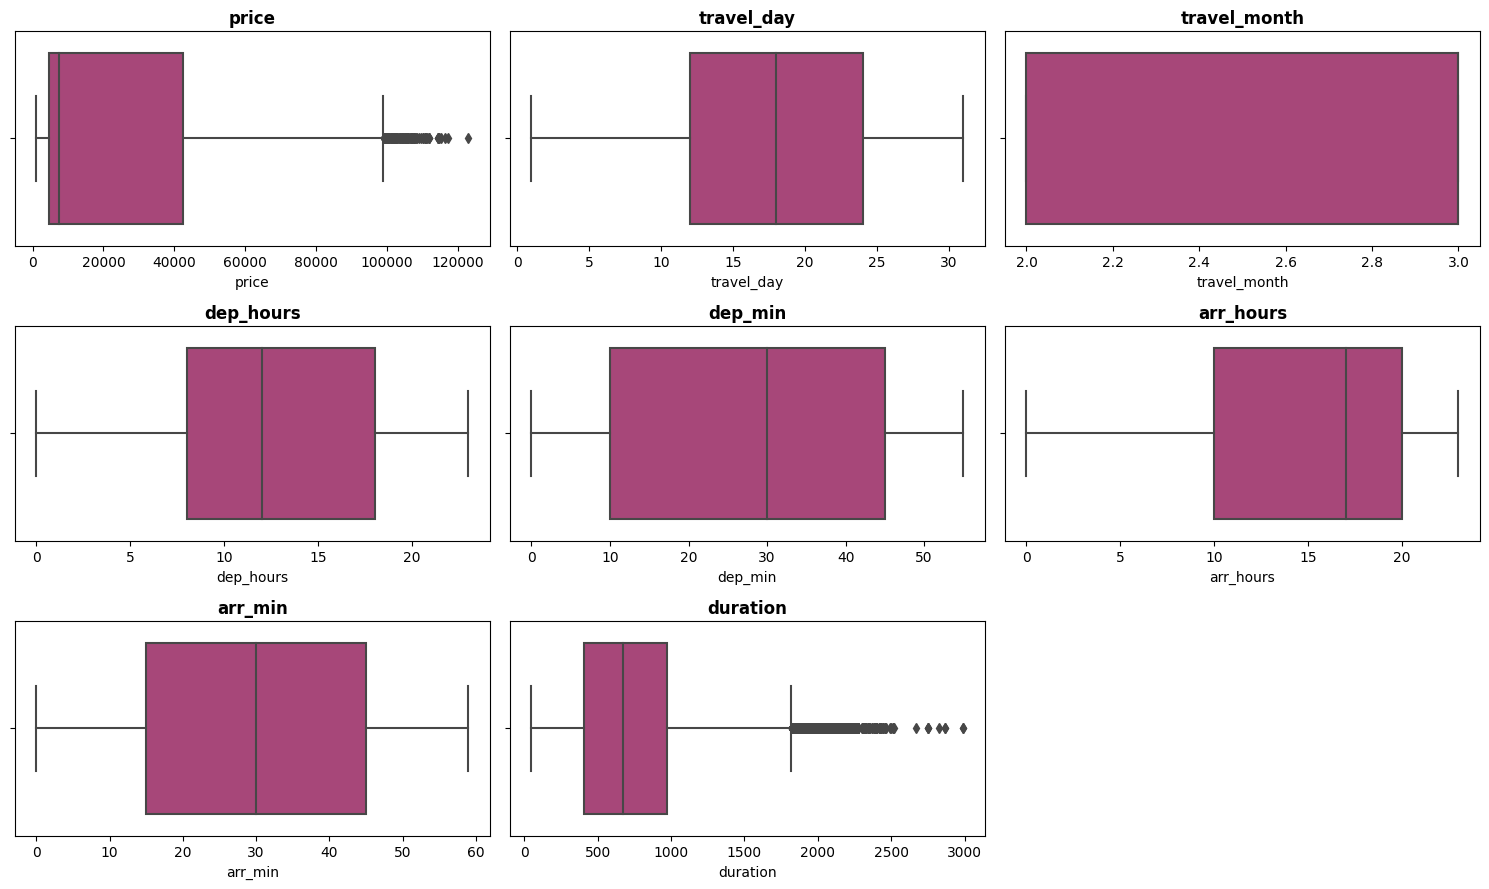

In [30]:
n = 1
plt.figure(figsize = (15,9))
for i in num_col.columns:
  plt.subplot(3,3,n)
  n +=1
  sns.boxplot(x = df[i],palette = 'magma',data = df).set_title( i, fontdict = { 'fontsize': 12},weight= 'bold')
  plt.tight_layout()

**There are outliers in price and duration category.**

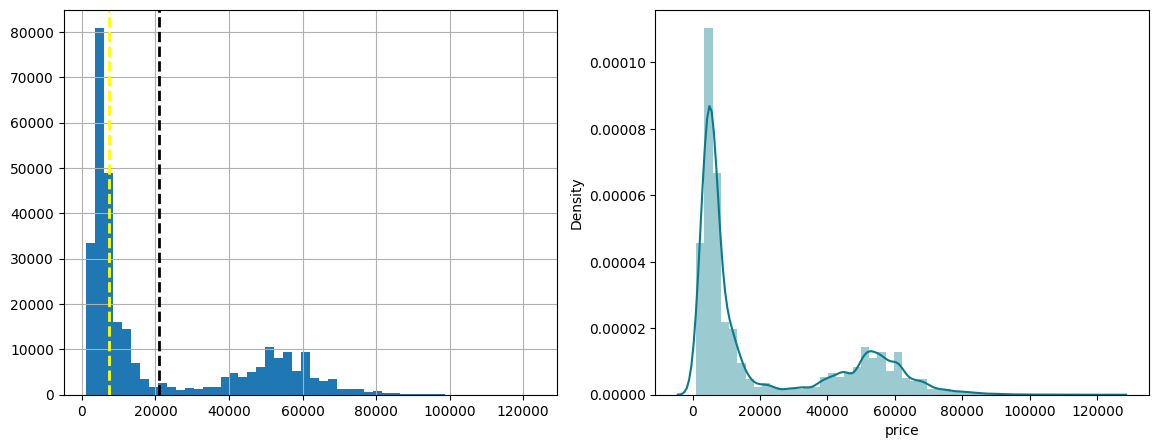

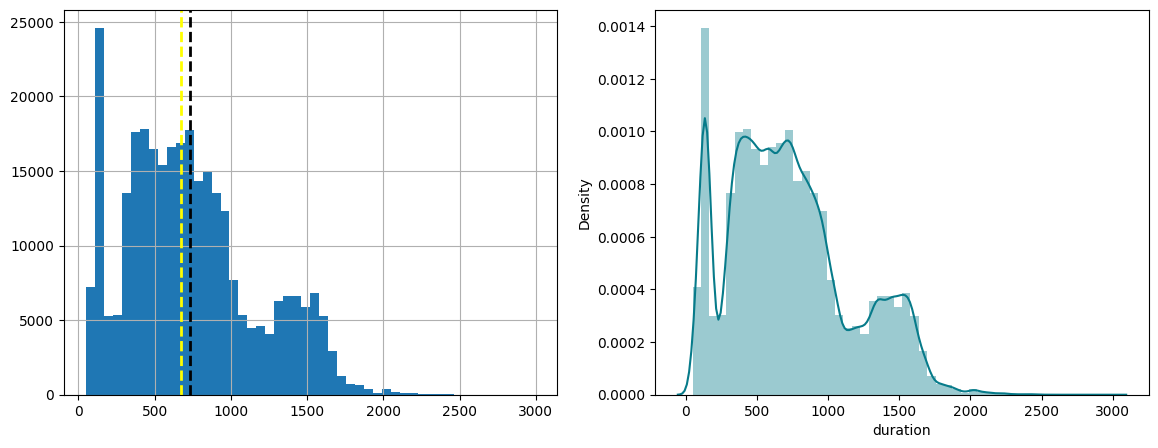

In [31]:
outliers = df[['price','duration']]
for i in outliers.columns:
  n =1
  plt.figure(figsize=(14,5))
  plt.subplot(1,2,n)
  n +=1
  feature = outliers[i]
  feature.hist(bins=50)
  plt.axvline(feature.mean(), color='black', linestyle='dashed', linewidth=2)
  plt.axvline(feature.median(), color='yellow', linestyle='dashed', linewidth=2) 
  plt.subplot(1,2,n)
  n +=1
  sns.distplot(df[i], color='#077b8a')
  plt.show()

**The data is skewed to right. The mean and median are also skewed.**

<Axes: xlabel='duration', ylabel='price'>

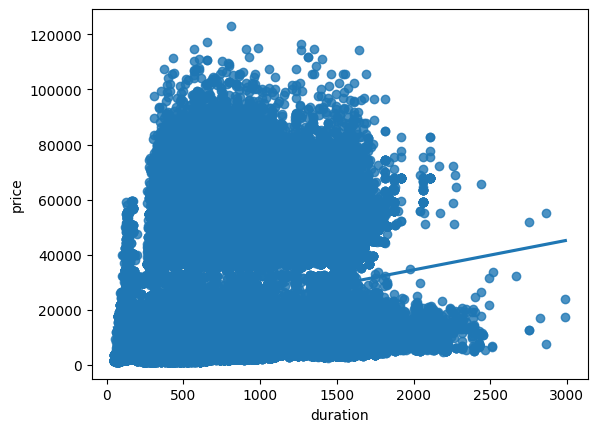

In [32]:
sns.regplot(x = df["duration"],y = df["price"])

**It shows that as duration increases, the price increase, but at a point price decreases for duration increase.**

In [33]:
quan_25 = df['duration'].quantile(0.25)
quan_75 = df['duration'].quantile(0.75)

IQR = quan_75 - quan_25

upper_limit = quan_75 + 1.5*IQR
lower_limit = quan_75 - 1.5*IQR

  #performing capping
df['duration'] = np.where(
    df['duration'] > upper_limit,
    upper_limit,
    df['duration']
  )

In [34]:
quan_25 = df['price'].quantile(0.25)
quan_75 = df['price'].quantile(0.75)

IQR = quan_75 - quan_25

upper_limit = quan_75 + 1.5*IQR
lower_limit = quan_75 - 1.5*IQR
print(upper_limit)
print(lower_limit)
  #performing capping
#df[df['price'] < upper_limit]
#new_df = 
# df['price'] = np.where(df['price'] < upper_limit,upper_limit,
#                       np.where(df['price'] > lower_limit,lower_limit))

df = df[(df['price'] < upper_limit)]

99128.0
-14086.0


In [35]:
df

,airline,from,stop,to,price,class_type,travel_day,travel_month,dep_hours,dep_min,arr_hours,arr_min,duration
0,Air India,Delhi,0,Mumbai,25612,Business,11,2,18,0,20,0,120.0
1,Air India,Delhi,0,Mumbai,25612,Business,11,2,19,0,21,15,135.0
2,Air India,Delhi,1,Mumbai,42220,Business,11,2,20,0,20,45,1485.0
3,Air India,Delhi,1,Mumbai,44450,Business,11,2,21,25,23,55,1590.0
4,Air India,Delhi,1,Mumbai,46690,Business,11,2,17,15,23,55,400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,Vistara,Chennai,1,Hyderabad,7697,Economy,31,3,7,5,20,55,830.0
300257,Vistara,Chennai,1,Hyderabad,7709,Economy,31,3,7,5,20,55,830.0
300258,Vistara,Chennai,1,Hyderabad,8640,Economy,31,3,12,30,9,5,1235.0
300259,Vistara,Chennai,1,Hyderabad,8640,Economy,31,3,9,45,9,5,1400.0


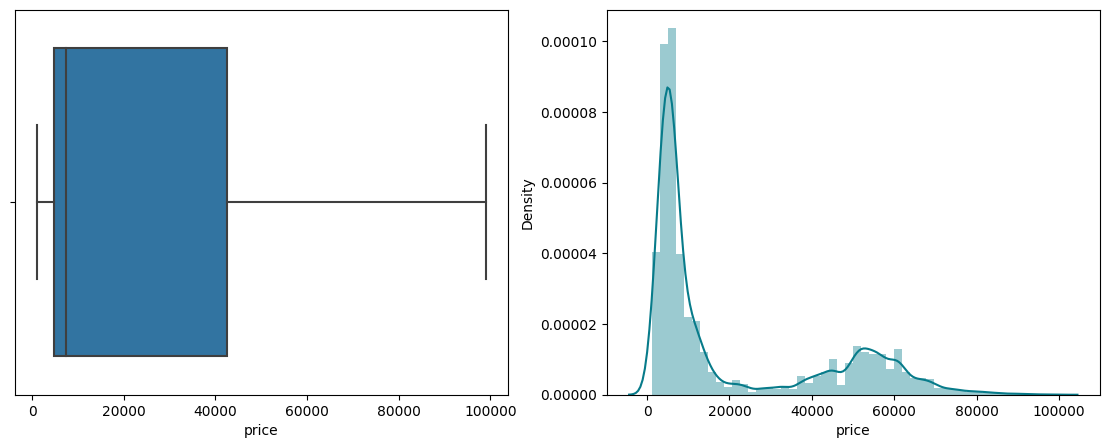

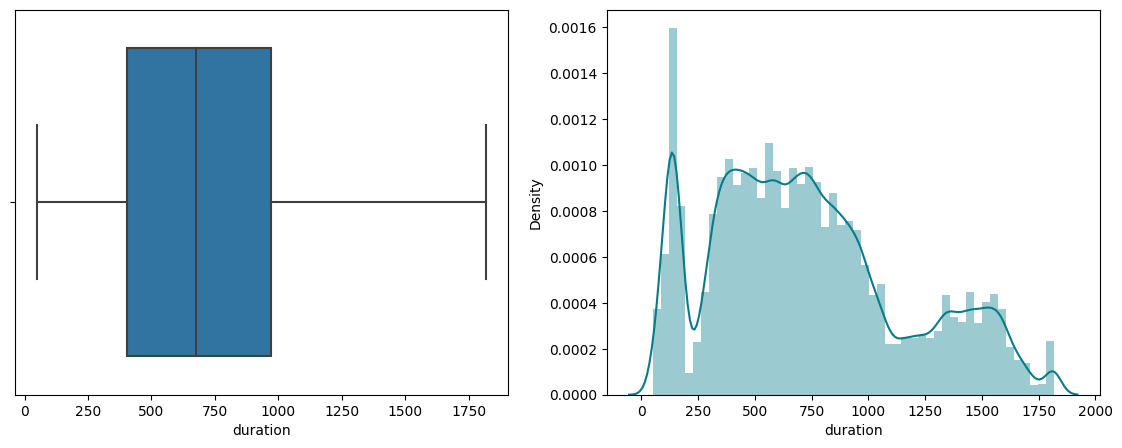

In [36]:
outliers = df[['price','duration']]
for i in outliers.columns:
  n =1
  plt.figure(figsize=(14,5))
  plt.subplot(1,2,n)
  n +=1
  feature = outliers[i]
  sns.boxplot(x =df[i],data = df) 
  plt.subplot(1,2,n)
  n +=1
  sns.distplot(df[i], color='#077b8a')
  plt.show()

**The outliers are removed successfully, which can be noticed in the plots.**

Which airline perferred more by busiess class or economy class

<Axes: xlabel='airline', ylabel='count'>

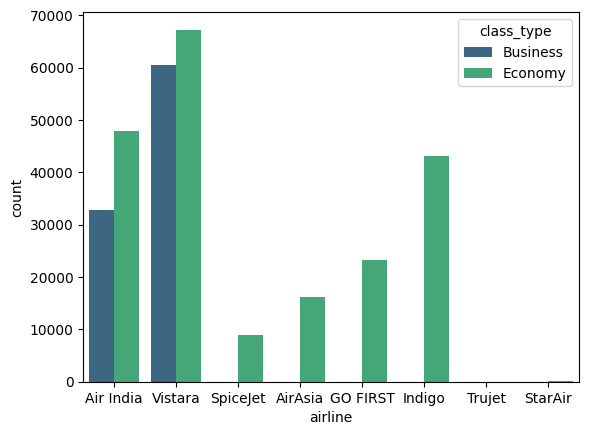

In [37]:
sns.countplot(x = df['airline'],hue = df['class_type'],palette = "viridis")

price vary with depature and destination

<Axes: xlabel='airline', ylabel='price'>

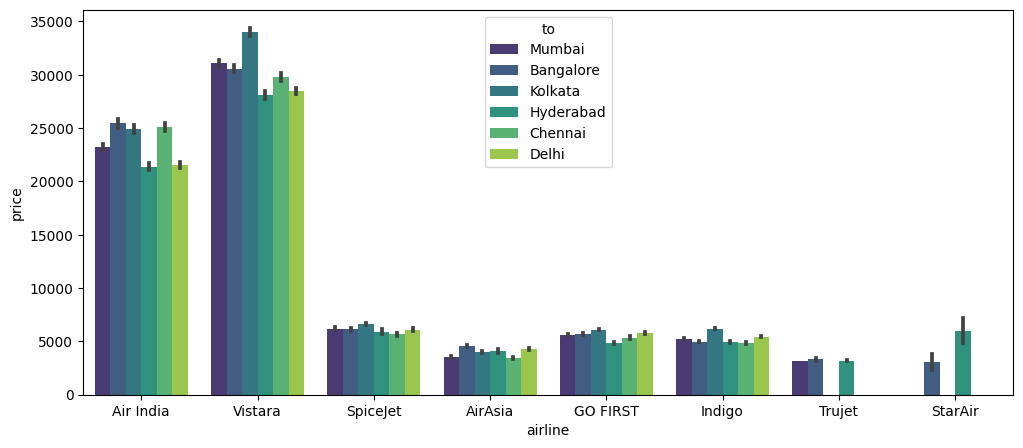

In [38]:
plt.figure(figsize=(12,5))
sns.barplot(data = df, x = "airline",y = "price",hue = "to",palette = "viridis")


<Axes: xlabel='airline', ylabel='price'>

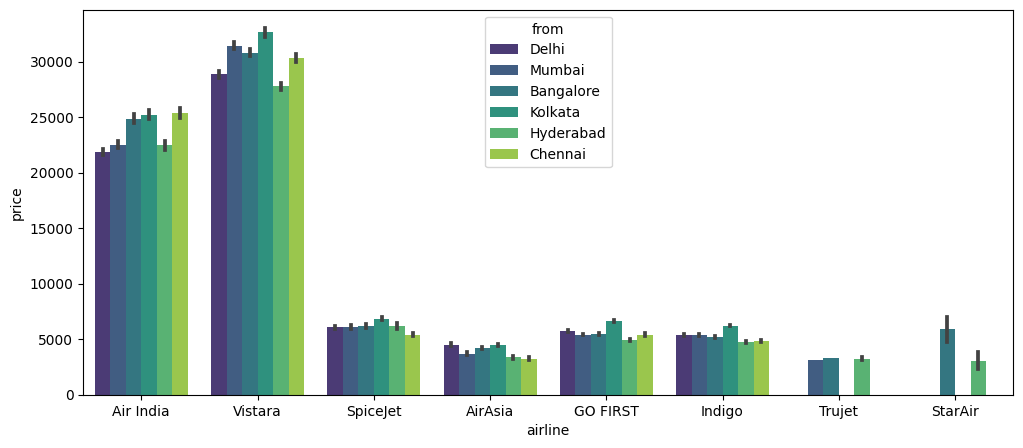

In [39]:
plt.figure(figsize=(12,5))
sns.barplot(data = df, x = "airline",y = "price",hue = "from",palette = "viridis")

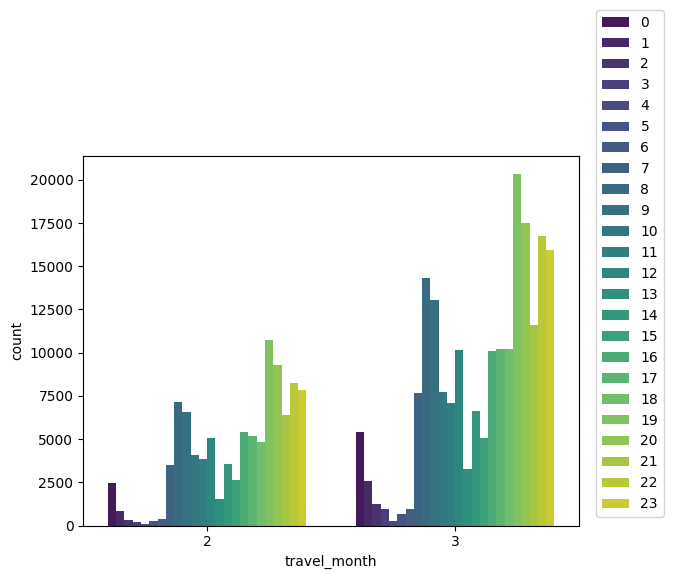

In [40]:
sns.countplot(x = df['travel_month'],hue = df['arr_hours'],palette = "viridis")
plt.legend(bbox_to_anchor=(1.02,0.005),loc='lower left')

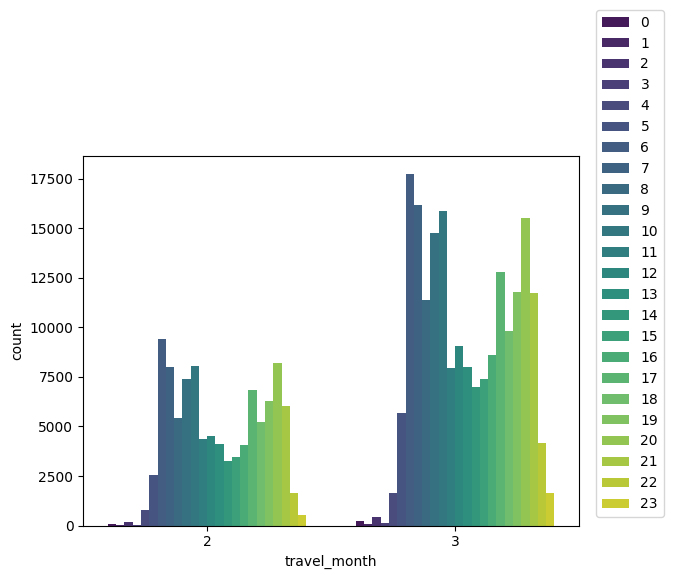

In [41]:
sns.countplot(x = df['travel_month'],hue = df['dep_hours'],palette = "viridis")
plt.legend(bbox_to_anchor=(1.02,0.005),loc='lower left')


Text(0.5, 1.0, 'Which month has more book in class type')

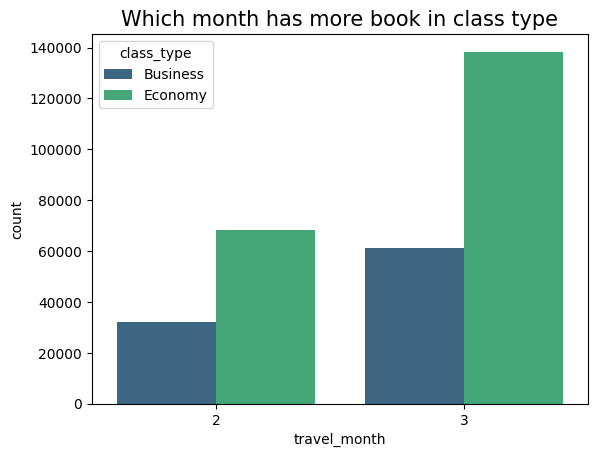

In [42]:
sns.countplot(x = df['travel_month'],hue = df['class_type'], palette='viridis').set_title('Which month has more book in class type',fontsize=15) 

multicollinearity

In [43]:
df.corr()['price']

price           1.000000
travel_day     -0.002892
travel_month   -0.090811
dep_hours       0.031367
dep_min         0.027723
arr_hours       0.073971
arr_min         0.043883
duration        0.207016
Name: price, dtype: float64

<Axes: >

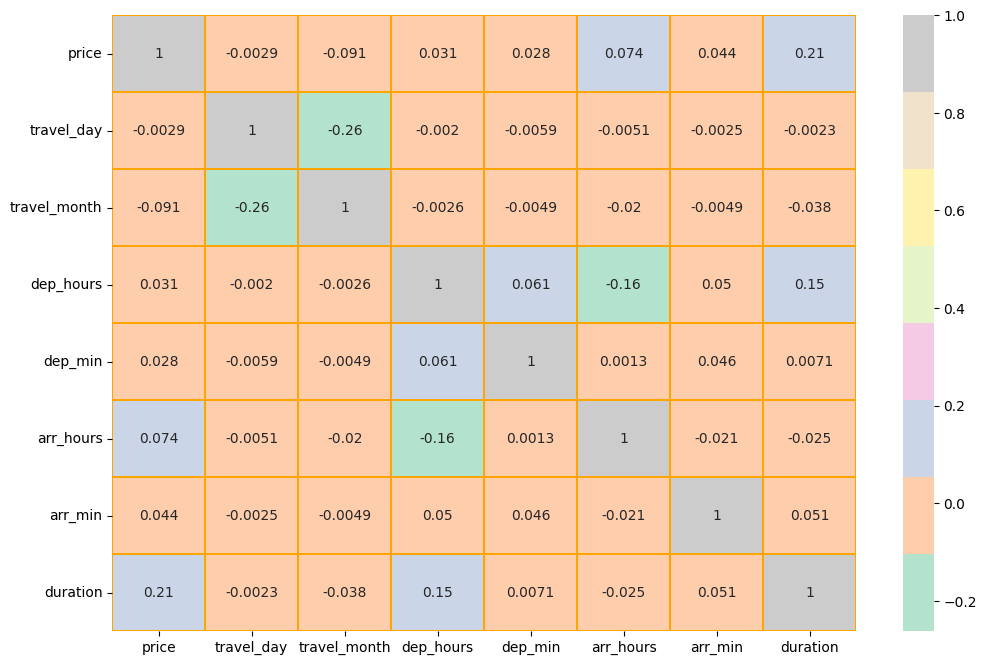

In [44]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),cmap = 'Pastel2', annot = True,linewidths=0.2,linecolor='orange')

##**Encoding**


In [45]:
df['class_type'] = df['class_type'].apply(lambda x: 1 if x == 'Business' else 0)

In [46]:
df['class_type'].value_counts()

0    206774
1     93364
Name: class_type, dtype: int64

In [47]:
# Creating a instance of label Encoder.
le = LabelEncoder()
df["airline"] = le.fit_transform(df['airline'])
df['from'] = le.fit_transform(df['from'])
df['to'] = le.fit_transform(df['to'])

df

,airline,from,stop,to,price,class_type,travel_day,travel_month,dep_hours,dep_min,arr_hours,arr_min,duration
0,0,2,0,5,25612,1,11,2,18,0,20,0,120.0
1,0,2,0,5,25612,1,11,2,19,0,21,15,135.0
2,0,2,1,5,42220,1,11,2,20,0,20,45,1485.0
3,0,2,1,5,44450,1,11,2,21,25,23,55,1590.0
4,0,2,1,5,46690,1,11,2,17,15,23,55,400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,7,1,1,3,7697,0,31,3,7,5,20,55,830.0
300257,7,1,1,3,7709,0,31,3,7,5,20,55,830.0
300258,7,1,1,3,8640,0,31,3,12,30,9,5,1235.0
300259,7,1,1,3,8640,0,31,3,9,45,9,5,1400.0


In [48]:
X = df.drop('price',axis = True)
y = df['price']

In [49]:
X.head()

,airline,from,stop,to,class_type,travel_day,travel_month,dep_hours,dep_min,arr_hours,arr_min,duration
0,0,2,0,5,1,11,2,18,0,20,0,120.0
1,0,2,0,5,1,11,2,19,0,21,15,135.0
2,0,2,1,5,1,11,2,20,0,20,45,1485.0
3,0,2,1,5,1,11,2,21,25,23,55,1590.0
4,0,2,1,5,1,11,2,17,15,23,55,400.0


In [50]:
y.head()

0    25612
1    25612
2    42220
3    44450
4    46690
Name: price, dtype: int64

In [51]:
# Train test split our data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)

In [52]:
X_train.head()

,airline,from,stop,to,class_type,travel_day,travel_month,dep_hours,dep_min,arr_hours,arr_min,duration
97896,7,2,1,5,0,5,3,14,15,23,25,550.0
220016,2,4,1,2,0,25,3,17,30,2,0,510.0
97108,0,2,0,5,0,2,3,20,0,22,10,130.0
15893,7,2,1,1,1,22,2,21,50,19,55,1325.0
134513,4,2,1,1,0,19,3,7,25,12,40,315.0


In [53]:
X_test.head()

,airline,from,stop,to,class_type,travel_day,travel_month,dep_hours,dep_min,arr_hours,arr_min,duration
60242,7,4,1,5,1,25,3,7,10,14,0,410.0
248986,0,3,1,2,0,8,3,13,5,20,20,435.0
254610,0,3,1,5,0,2,3,20,50,11,15,865.0
274559,7,1,0,2,0,17,2,6,55,9,45,170.0
167357,0,5,1,3,0,8,3,5,5,21,5,960.0


In [54]:
y_train.head()

97896      6611
220016     6324
97108      2476
15893     65944
134513     5768
Name: price, dtype: int64

In [55]:
y_test.head()

60242     56991
248986     5697
254610     4363
274559     7353
167357     5303
Name: price, dtype: int64

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((225103, 12), (75035, 12), (225103,), (75035,))

In [57]:
# Appending all models parameters to the corrosponding list

mean_absolut_error = []
mean_sq_error=[]
root_mean_sq_error=[]
training_score =[]
r2_list=[]
adj_r2_list=[]
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def matrix_score (model,X_train,X_test,Y_train,Y_test):
  #training the model
  model.fit(X_train,Y_train)
  test = model.score(X_test,y_test)
  print("Testing score  =", test)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)

  print('\n')

  try:
    # finding the best parameters of the model if any
    print('\033[1m' + 'Best Parameters & Best Score' +  '\033[0m')  
    print('\n')
    print(f"The best parameters found out to be :{model.best_params_} \nwhere model best score is:  {model.best_score_} \n")
    print('\n')
  except:
    print('None')

  #predicting the Test set and evaluting the models
  print('\n')
  print('\033[1m' + 'Evalution Matrix'+ '\033[0m')
  print('\n')

  if model == Linear or model == Lasso or model == ridge:
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)
    
    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)
    
    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    
    #finding the r2 score
    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)

    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')


  else:
    # for tree base models
    Y_pred = model.predict(X_test)
  
    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score
    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)

    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')


  # Here we appending the parameters for all models 

  mean_absolut_error.append(MAE)
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  training_score.append(training)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)

  # print the cofficient and intercept of which model have these parameters and else we just pass them

  if model == Linear:
    print('\n')
    print('\033[1m' + 'coefficient' + '\033[0m')          

    print(model.coef_)

    print('\n')

    print('\033[1m' + 'Intercept'+ '\033[0m')
  

    print(model.intercept_)

  else:
    pass

In [58]:
# Transforming data

scaler=MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##**Linear Regression**

In [59]:
Linear = LinearRegression()

# Importing Fitting the linear regression model with our matrix_score function 
matrix_score(Linear,X_train,X_test,y_train,y_test)

Testing score  = 0.9078345741620851
Training score  = 0.9082694326936627


Best Parameters & Best Score


None


Evalution Matrix


MAE : 305141603.5100578
MSE : 4.5478695146345075e+17
RMSE : 674378937.5888387
R2 : 0.804331494482853
Adjusted R2 :  0.8043001967026524 



coefficient
[ 4.11341099e+03  5.47905388e+02  1.16824970e+04  7.49662774e+02
  4.49831153e+04 -2.16141392e+03 -3.97421267e+03 -3.76815037e+01
  1.85363163e+01  1.10928778e+03 -7.99712734e+02  2.50734217e+03]


Intercept
1121.5325817095109


##**Regularization**
Lasso with hyperparameter tuning

In [60]:
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}             #lasso parameters 
Lasso = GridSearchCV(Lasso(), parameters, cv=5)  

matrix_score(Lasso,X_train,X_test,y_train,y_test)

Testing score  = 0.9078345971138809
Training score  = 0.9082694301607138


Best Parameters & Best Score


The best parameters found out to be :{'alpha': 0.1} 
where model best score is:  0.9082530389412984 





Evalution Matrix


MAE : 305144974.5989714
MSE : 4.5480729329914995e+17
RMSE : 674394019.3233849
R2 : 0.8043227425681863
Adjusted R2 :  0.80429144338809 



Ridge with hyperparameter tuning

In [62]:
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}          # giving parameters 
ridge = GridSearchCV(Ridge(), parameters, scoring='r2', cv=10)        

matrix_score(ridge,X_train,X_test,y_train,y_test)

Testing score  = 0.9078346317065651
Training score  = 0.908269432132374


Best Parameters & Best Score


The best parameters found out to be :{'alpha': 1} 
where model best score is:  0.9082551185962855 





Evalution Matrix


MAE : 305145031.2700732
MSE : 4.5479990790269805e+17
RMSE : 674388543.7214203
R2 : 0.8043259200768675
Adjusted R2 :  0.8042946214050236 



#**Conclusion**

It can be noticed that using all three algorithms resulted in almost same accuracy. The results did not change with the algorithms.